In [1]:
#Conectar a drive y leer base de datos

import pandas as pd

base = pd.read_csv('/content/drive/MyDrive/Externado/10ma clase/Base de datos.csv', sep=';', usecols=list(range(0,8)))

base.dropna(inplace=True) #Elimina las filas que contengan NaN en una de las columnas y reemplaza el dataframe inicial (inplace)


base

,Fecha,LEGATRUU Index,COP Curncy,MXEF Index,COLCAP Index,SPX Index,.2-10us Index,Bitcoin
1020,18/10/2010,435.1574,1810.00,1112.42,1833.59,1184.71,214.8619,$ 0.10
1021,19/10/2010,432.1409,1815.65,1097.66,1857.75,1165.90,211.6364,$ 0.10
1022,20/10/2010,434.9701,1808.90,1101.28,1860.52,1178.17,213.6082,$ 0.10
1023,21/10/2010,434.5142,1818.77,1106.23,1877.98,1180.27,219.4457,$ 0.11
1024,22/10/2010,433.2633,1830.00,1105.19,1906.66,1183.08,220.3519,$ 0.10
...,...,...,...,...,...,...,...,...
5505,28/01/2023,460.6262,4577.04,1051.19,1285.89,4070.56,-69.5588,22979.50977
5506,29/01/2023,460.6262,4577.04,1051.19,1285.89,4070.56,-69.5588,23724.01367
5507,30/01/2023,459.9795,4654.90,1044.00,1280.22,4017.77,-69.7491,22804.56641
5508,31/01/2023,460.5541,4670.86,1031.50,1290.11,4076.60,-69.4285,23171.12109


In [2]:
print(base.dtypes)

base['Fecha'] = pd.to_datetime(base['Fecha'], format='%d/%m/%Y')

base.set_index('Fecha', inplace=True)

base

Fecha              object
LEGATRUU Index    float64
COP Curncy        float64
MXEF Index        float64
COLCAP Index      float64
SPX Index         float64
.2-10us Index     float64
Bitcoin            object
dtype: object


,LEGATRUU Index,COP Curncy,MXEF Index,COLCAP Index,SPX Index,.2-10us Index,Bitcoin
Fecha,,,,,,,
2010-10-18,435.1574,1810.00,1112.42,1833.59,1184.71,214.8619,$ 0.10
2010-10-19,432.1409,1815.65,1097.66,1857.75,1165.90,211.6364,$ 0.10
2010-10-20,434.9701,1808.90,1101.28,1860.52,1178.17,213.6082,$ 0.10
2010-10-21,434.5142,1818.77,1106.23,1877.98,1180.27,219.4457,$ 0.11
2010-10-22,433.2633,1830.00,1105.19,1906.66,1183.08,220.3519,$ 0.10
...,...,...,...,...,...,...,...
2023-01-28,460.6262,4577.04,1051.19,1285.89,4070.56,-69.5588,22979.50977
2023-01-29,460.6262,4577.04,1051.19,1285.89,4070.56,-69.5588,23724.01367
2023-01-30,459.9795,4654.90,1044.00,1280.22,4017.77,-69.7491,22804.56641


In [3]:
print(base.dtypes)

# Reemplaza "$" con "" en cada celda de la columna
try:
 base['Bitcoin'] = base['Bitcoin'].str.replace("$", "")
 base['Bitcoin'] = base['Bitcoin'].str.replace(" ", "")
 base['Bitcoin'] = base['Bitcoin'].str.replace(",", "")
except:
  a = 1


# Convierte la columna a números
base['Bitcoin'] = pd.to_numeric(base['Bitcoin'])

print(base.dtypes)

LEGATRUU Index    float64
COP Curncy        float64
MXEF Index        float64
COLCAP Index      float64
SPX Index         float64
.2-10us Index     float64
Bitcoin            object
dtype: object
LEGATRUU Index    float64
COP Curncy        float64
MXEF Index        float64
COLCAP Index      float64
SPX Index         float64
.2-10us Index     float64
Bitcoin           float64
dtype: object


<ipython-input-3-2656be57ea44>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  base['Bitcoin'] = base['Bitcoin'].str.replace("$", "")


In [4]:
#Calcular los retornos

base_pct = base.pct_change()

base_pct

,LEGATRUU Index,COP Curncy,MXEF Index,COLCAP Index,SPX Index,.2-10us Index,Bitcoin
Fecha,,,,,,,
2010-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-19,-0.006932,0.003122,-0.013268,0.013176,-0.015877,-0.015012,0.000000
2010-10-20,0.006547,-0.003718,0.003298,0.001491,0.010524,0.009317,0.000000
2010-10-21,-0.001048,0.005456,0.004495,0.009384,0.001782,0.027328,0.100000
2010-10-22,-0.002879,0.006175,-0.000940,0.015272,0.002381,0.004129,-0.090909
...,...,...,...,...,...,...,...
2023-01-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.013085
2023-01-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032399
2023-01-30,-0.001404,0.017011,-0.006840,-0.004409,-0.012969,0.002736,-0.038756


In [5]:
base_corr = base_pct.corr()

base_corr

,LEGATRUU Index,COP Curncy,MXEF Index,COLCAP Index,SPX Index,.2-10us Index,Bitcoin
LEGATRUU Index,1.000000,-0.167070,0.145067,0.065290,0.003978,0.007912,0.041889
COP Curncy,-0.167070,1.000000,-0.371650,-0.294340,-0.309343,0.005333,-0.031625
MXEF Index,0.145067,-0.371650,1.000000,0.420312,0.444424,0.011304,0.038462
COLCAP Index,0.065290,-0.294340,0.420312,1.000000,0.449499,0.013263,0.058038
SPX Index,0.003978,-0.309343,0.444424,0.449499,1.000000,0.022779,0.124703
.2-10us Index,0.007912,0.005333,0.011304,0.013263,0.022779,1.000000,-0.002177
Bitcoin,0.041889,-0.031625,0.038462,0.058038,0.124703,-0.002177,1.000000


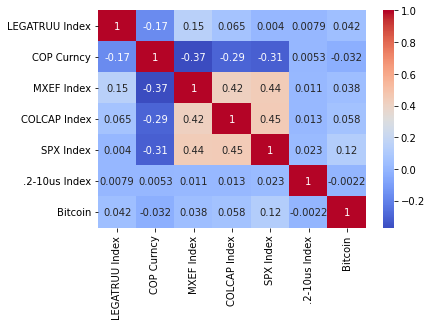

In [6]:
#Correlaciones con información diaria
import seaborn as sns

import matplotlib.pyplot as plt

sns.heatmap(base_corr, annot=True, cmap='coolwarm')
plt.show()

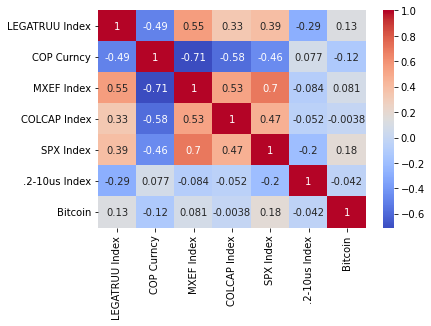

In [7]:
#Datos mensuales 

base_mensual = base.resample('M').last()

base_mensual_corr = base_mensual.pct_change().corr()

sns.heatmap(base_mensual_corr, annot=True, cmap='coolwarm')
plt.show()

Indique periodicidad de los datos (D,B,W,M,Q,A)Q


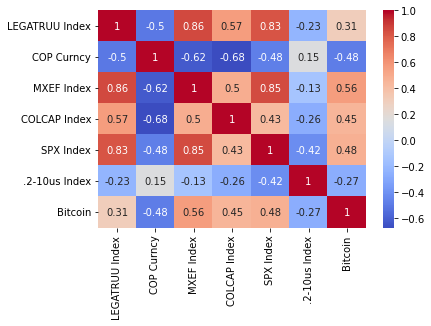

In [ ]:
#Desde una fecha

periodicidad = str(input("Indique periodicidad de los datos (D,B,W,M,Q,A)"))

base_final = base.resample(periodicidad).last()

base_final = base_final.loc['2020-01-01':] #indique desde que fecha

base_final_corr = base_final.pct_change().corr()

sns.heatmap(base_final_corr, annot=True, cmap='coolwarm')
plt.show()

## Beta

In [15]:
#Matriz de covarianzas

periodicidad = str(input("Indique periodicidad de los datos (D,B,W,M,Q,A)"))

base_final = base.resample(periodicidad).last()

base_final = base_final.loc['2020-01-01':] #indique desde que fecha

base_final_pct = base_final.pct_change()

base_final_pct.cov()

Indique periodicidad de los datos (D,B,W,M,Q,A)M


,LEGATRUU Index,COP Curncy,MXEF Index,COLCAP Index,SPX Index,.2-10us Index,Bitcoin
LEGATRUU Index,0.000483,-0.000433,0.000938,0.000521,0.000843,-0.093145,0.001833
COP Curncy,-0.000433,0.001882,-0.001755,-0.002345,-0.001448,0.070582,-0.004536
MXEF Index,0.000938,-0.001755,0.003529,0.002479,0.002571,-0.099975,0.005879
COLCAP Index,0.000521,-0.002345,0.002479,0.005553,0.002631,-0.055633,0.007743
SPX Index,0.000843,-0.001448,0.002571,0.002631,0.003705,-0.181509,0.008545
.2-10us Index,-0.093145,0.070582,-0.099975,-0.055633,-0.181509,108.584318,-0.390762
Bitcoin,0.001833,-0.004536,0.005879,0.007743,0.008545,-0.390762,0.052502


In [40]:
#Covarianza entre Bitcoin y el SPX
covariance = base_final_pct['SPX Index'].cov(base_final_pct['Bitcoin'])

covariance = base_final_pct['Bitcoin'].cov(base_final_pct['SPX Index'])

covariance

0.008545445413301715

In [31]:
#Varianza mercado
variance_market = base_final_pct['SPX Index'].var()

variance_market

0.003704962683528568

In [18]:
#Beta

beta = covariance/variance_market

beta

2.306486230291292

## Beta regresión

In [69]:
#Calcular la regresión lineal
import statsmodels.api as sm

exogena = base_final_pct['SPX Index'].dropna() 

exogena = sm.add_constant(exogena) #No da significativa

modelo = sm.OLS(endog=base_final_pct['Bitcoin'].dropna(), exog=exogena, hasconst=True)
modelo = modelo.fit()
print(modelo.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                Bitcoin   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     21.04
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           5.55e-05
Time:                        03:26:43   Log-Likelihood:                 11.231
No. Observations:                  37   AIC:                            -18.46
Df Residuals:                      35   BIC:                            -15.24
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0312      0.030      1.025      0.3

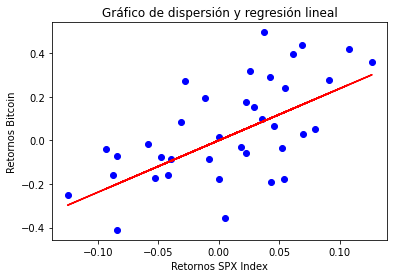

In [68]:
import matplotlib.pyplot as plt

coef = modelo.params[0]


# Crear una línea de regresión lineal a partir de la pendiente e intercepción calculadas
regression_line = coef * base_final_pct['SPX Index'] 


# Dibujar el gráfico de dispersión y la línea de regresión
plt.scatter(base_final_pct['SPX Index'], base_final_pct['Bitcoin'], color='blue')
plt.plot(base_final_pct['SPX Index'], regression_line, color='red')
plt.xlabel('Retornos SPX Index')
plt.ylabel('Retornos Bitcoin')
plt.title('Gráfico de dispersión y regresión lineal')
plt.show()